In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical


<ipython-input-3-997acd6f3f2b>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4,4,i)


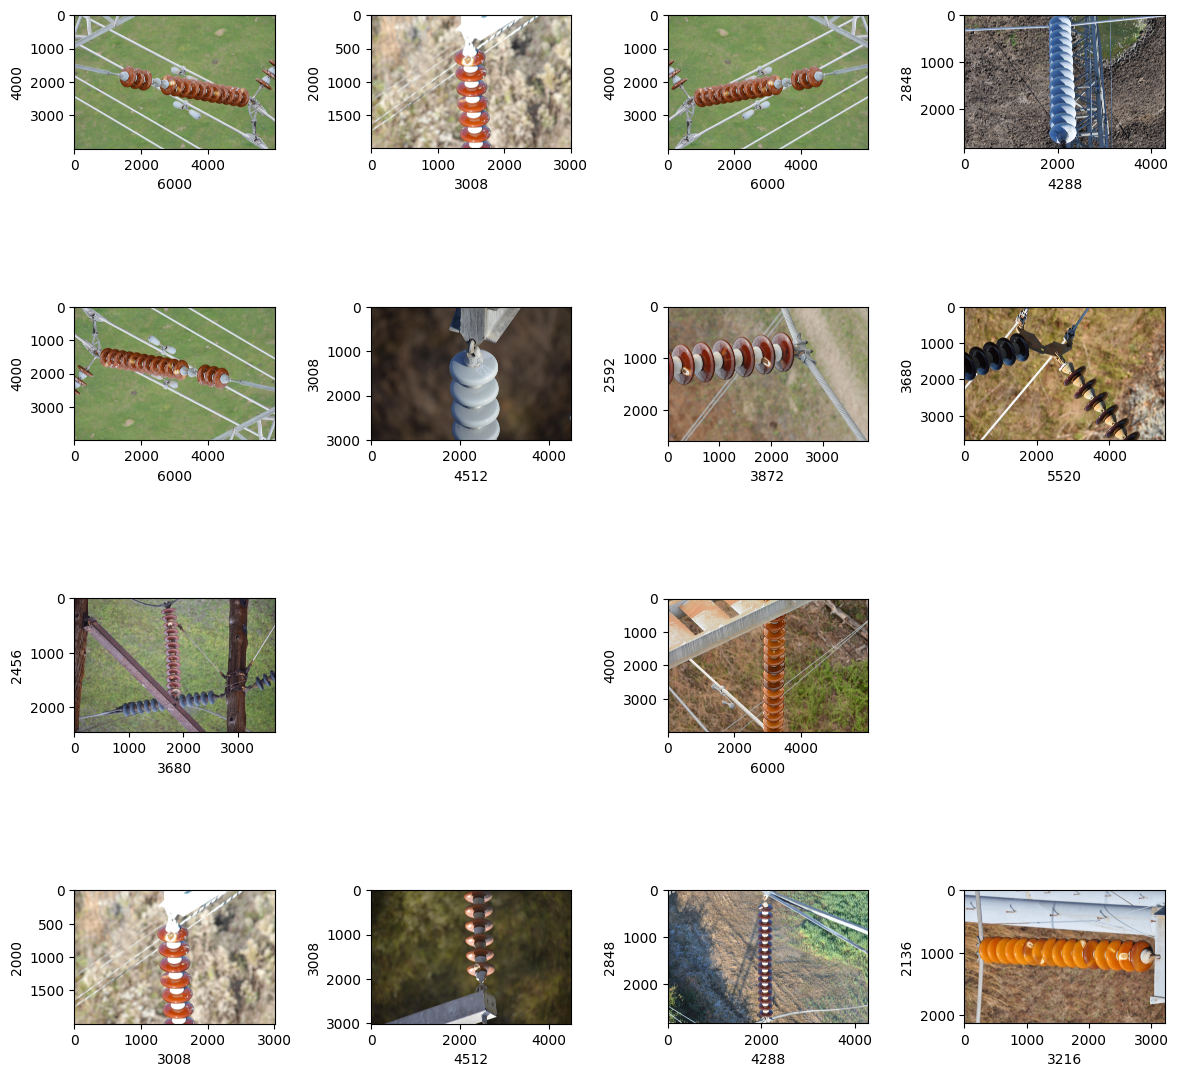

In [3]:
plt.figure(figsize=(12,12))
path = "/content/drive/My Drive/data/health"
for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img = imread(path+'/'+random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize = 10)
  plt.ylabel(rand_img.shape[0], fontsize = 10)

In [4]:
def convert_image_to_array(image_dir):
  try:
    image = cv2.imread(image_dir)
    if image is not None:
      image = cv2.resize(image, (256,256))
      return img_to_array(image)
    else:
      return np.array([])
  except Exception as e:
    print(f"Error : (e)")
    return None


In [5]:
dir = "/content/drive/My Drive/data"
image_list, label_list = [], []
all_labels = ['Positive', 'Negative']
binary_labels = [0,1]
temp = -1

for directory in ['crack', 'health']:
  transformer_image_list = listdir(f"{dir}/{directory}")
  temp += 1
  for files in transformer_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

In [6]:
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

1    79
0    73
dtype: int64

In [7]:
image_list[0].shape

(256, 256, 3)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10)

In [9]:
x_train = np.array(x_train, dtype=np.float16) / 255.0
x_test = np.array(x_test, dtype=np.float16) / 255.0
x_train = x_train.reshape(-1,256,256,3)
x_test = x_test.reshape(-1,256,256,3)

In [10]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
model = Sequential()
model.add(Conv2D(32,(3,3), padding = "same", input_shape = (256,256,3), activation = "relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(16, (3,3), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(8, activation = "relu"))
model.add(Dense(2, activation = "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 42, 42, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28224)             0         
                                                                 
 dense (Dense)               (None, 8)                 2

In [12]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001), metrics=['accuracy'])

In [13]:
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size =0.2, random_state=10)

In [14]:
# x_train = np.array(x_train, dtype=np.float16) / 255.0
# x_val = np.array(x_val, dtype=np.float16) / 255.0
# x_train = x_train.reshape(-1,256,256,3)
# x_val = x_val.reshape(-1,256,256,3)

In [15]:
# y_train = to_categorical(y_train)
# y_val = to_categorical(y_val)

In [16]:
epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data= (x_val,y_val))

Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 0.7060 - accuracy: 0.4792 - val_loss: 0.6979 - val_accuracy: 0.5200
Epoch 2/50
1/1 [==============================] - 3s 3s/step - loss: 0.6903 - accuracy: 0.5104 - val_loss: 0.7039 - val_accuracy: 0.4800
Epoch 3/50
1/1 [==============================] - 5s 5s/step - loss: 0.6903 - accuracy: 0.5208 - val_loss: 0.6954 - val_accuracy: 0.5600
Epoch 4/50
1/1 [==============================] - 3s 3s/step - loss: 0.6805 - accuracy: 0.5417 - val_loss: 0.6845 - val_accuracy: 0.5600
Epoch 5/50
1/1 [==============================] - 3s 3s/step - loss: 0.6722 - accuracy: 0.6562 - val_loss: 0.6779 - val_accuracy: 0.4800
Epoch 6/50
1/1 [==============================] - 4s 4s/step - loss: 0.6698 - accuracy: 0.5729 - val_loss: 0.6760 - val_accuracy: 0.4800
Epoch 7/50
1/1 [==============================] - 4s 4s/step - loss: 0.6642 - accuracy: 0.5729 - val_loss: 0.6763 - val_accuracy: 0.5200
Epoch 8/50
1/1 [=========================

In [17]:
model.save("/content/drive/My Drive/model/transformer_health_prediction.h5")

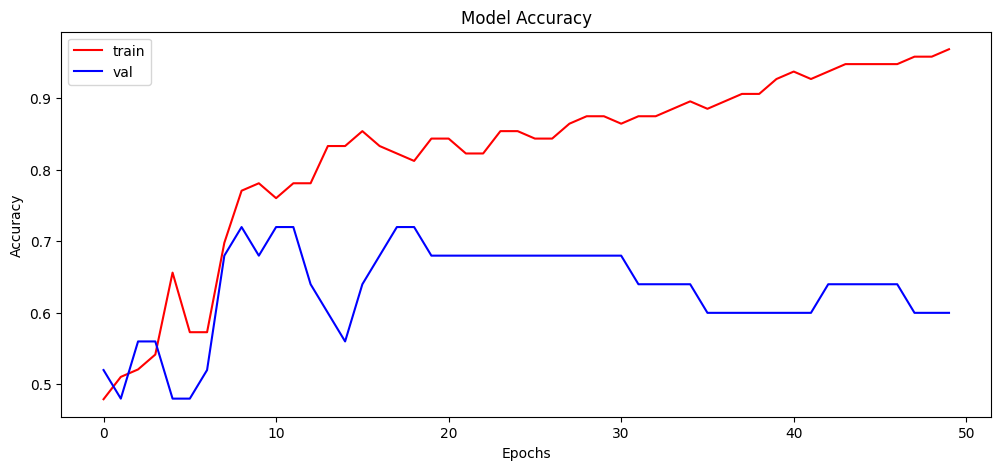

In [18]:
plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'],color='r')
plt.plot(history.history['val_accuracy'],color='b')
plt.title('Model Accuracy')
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train", "val"])

plt.show()

In [19]:
print("Model Accuracy ===========")
scores = model.evaluate(x_test,y_test)
print(f"Accuracy: {scores[1]*100}")


Model Accuracy ===========
1/1 [==============================] - 1s 561ms/step - loss: 0.5199 - accuracy: 0.8065
Accuracy: 80.64516186714172


In [20]:
y_pred = model.predict(x_test)

1/1 [==============================] - 1s 648ms/step


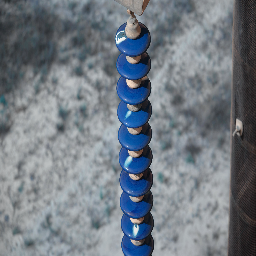

In [21]:
img = array_to_img(x_test[11])
img

In [61]:
print("Orignal Label: ", all_labels[np.argmax(y_test[14])])
print("Predicted Label: ", all_labels[np.argmax(y_pred[14])])
print(y_pred[14])

Orignal Label:  Positive
Predicted Label:  Positive
[0.61247915 0.3875208 ]


In [24]:
for i in range(30):
  print(all_labels[np.argmax(y_test[i])], ' - ', all_labels[np.argmax(y_pred[i])])

Negative  -  Negative
Negative  -  Negative
Positive  -  Positive
Negative  -  Negative
Positive  -  Negative
Negative  -  Negative
Positive  -  Negative
Negative  -  Negative
Positive  -  Positive
Negative  -  Negative
Negative  -  Negative
Negative  -  Negative
Positive  -  Negative
Positive  -  Positive
Positive  -  Positive
Positive  -  Negative
Negative  -  Negative
Negative  -  Negative
Positive  -  Positive
Negative  -  Negative
Negative  -  Negative
Negative  -  Negative
Positive  -  Positive
Positive  -  Negative
Negative  -  Negative
Positive  -  Positive
Positive  -  Positive
Positive  -  Positive
Negative  -  Negative
Negative  -  Negative
